In [23]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

In [24]:
idk = gpd.read_file("/workspaces/Emergency-Services-Comparison/maps/countries/ne_50m_admin_0_countries.shp")
idk.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


<Axes: >

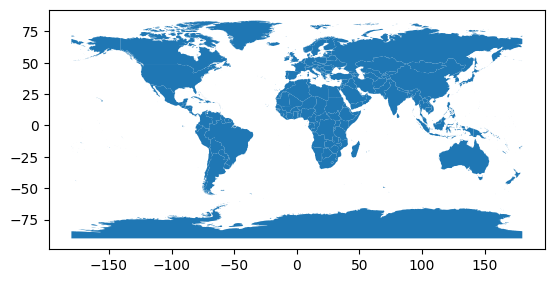

In [25]:
idk.plot()

<Axes: >

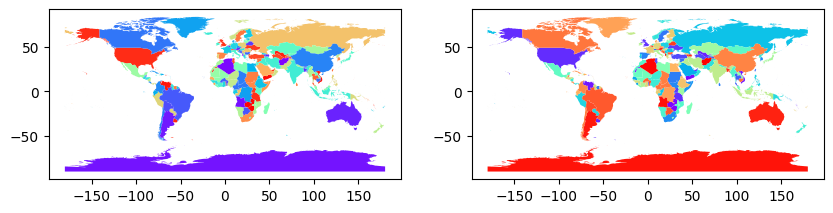

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Use the 'name' column for coloring
idk.plot(column='SOVEREIGNT', ax=ax1, cmap='rainbow')

idk.plot(column='SOVEREIGNT', ax=ax2, cmap='rainbow_r')

In [27]:
countries = idk.SOVEREIGNT.iloc()[:]
countries.head()

0     Zimbabwe
1       Zambia
2        Yemen
3      Vietnam
4    Venezuela
Name: SOVEREIGNT, dtype: object

In [33]:

df_map = gpd.GeoDataFrame({
    'country name': idk['SOVEREIGNT'],
    'geometry': idk['geometry'],
    'color': [(i, i, i) for i in idk.index]
})
df_map.head()

,country name,geometry,color
0,Zimbabwe,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...","(0, 0, 0)"
1,Zambia,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...","(1, 1, 1)"
2,Yemen,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...","(2, 2, 2)"
3,Vietnam,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...","(3, 3, 3)"
4,Venezuela,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...","(4, 4, 4)"


colormap explanation: https://matplotlib.org/stable/users/explain/colors/colormaps.html

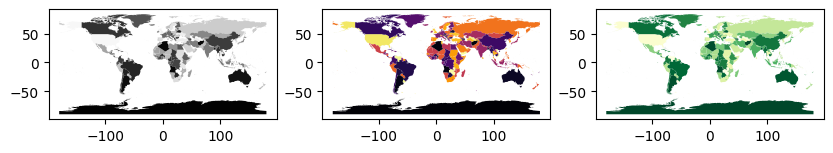

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))

# Use the 'color' column for coloring
df_map.plot(column='color', ax=ax1, cmap='Greys')
df_map.plot(column='color', ax=ax2, cmap='inferno_r')
df_map.plot(column='color', ax=ax3, cmap='YlGn')

plt.show()